In [395]:
### Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [396]:
### Importing Dataset

# File 1 - application_data
a = pd.read_csv(r'C:\Users\Rita Benjamin\OneDrive\Desktop\Data Science\Python\Exploratory Data Analysis\Assignment\application_data.csv')
a.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [397]:
#### EDA Assignment

In [398]:
# File 2 - previous_application
b = pd.read_csv(r'C:\Users\Rita Benjamin\OneDrive\Desktop\Data Science\Python\Exploratory Data Analysis\Assignment\previous_application.csv')
b.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [399]:
# Additional and common columns in the two files 

additional = []
common = []

for col in a.columns:
    if col not in b.columns:
        additional.append(col)
    else:
        common.append(col)
        
print(len(additional))
print(len(common))
print(common)

# SK_ID_CURR is a unique identifier which can be used to merge the 2 files

114
8
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


In [400]:
# Shape of dataset (File 1)
a.shape

(307511, 122)

In [401]:
## Data Cleaning
# Checking for missing/null values in columns

round(a.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
                            ...  
NAME_FAMILY_STATUS           0.00
NAME_EDUCATION_TYPE          0.00
NAME_INCOME_TYPE             0.00
AMT_ANNUITY                  0.00
SK_ID_CURR                   0.00
Length: 122, dtype: float64

In [402]:
# Null value columns more than 50%

nc=a.isnull().sum()
nc=nc[nc.values>(0.5*len(nc))]
len(nc)

64

In [403]:
# Removing the columns with more than 50% null values

a = a.loc[:,a.isnull().mean()<=0.5]
a.shape

(307511, 81)

In [404]:
# Number of null value columns less than 13%

list(a.columns[(a.isnull().mean()<=0.13) & (a.isnull().mean()>0)]) 

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [405]:
# Checking for missing/null values in rows

nr = a.isnull().sum(axis=1).sort_values(ascending=False)
nr.head()

244833    20
269786    20
54457     20
53941     20
12087     20
dtype: int64

In [406]:
# Null value rows more than 10%

nr = nr[nr.values>(0.1*len(nr))]
len(nr)

0

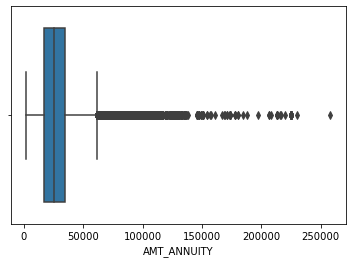

In [407]:
# Fixing the column 'AMT_ANNUITY'

sns.boxplot(a['AMT_ANNUITY'])
plt.show()

In [408]:
# 'AMT_ANNUITY' has a widespread outlier, hence it can be filled with median and not mean

values=a['AMT_ANNUITY'].median()
a.loc[a['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values
a.AMT_ANNUITY.isnull().sum()

0

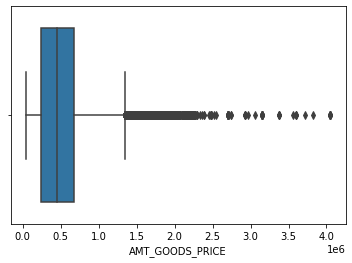

In [409]:
# Fixing the column 'AMT_GOODS_PRICE'

sns.boxplot(a['AMT_GOODS_PRICE'])
plt.show()

In [410]:
# 'AMT_GOODS_PRICE' has a widespread outlier, hence it can be filled with median and not mean

values=a['AMT_GOODS_PRICE'].median()
a.loc[a['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE']=values
a.AMT_ANNUITY.isnull().sum()

0

In [411]:
# Fixing the column 'NAME_TYPE_SUITE'

a['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [412]:
# 'NAME_TYPE_SUITE' is a categorical column, hence it can be fixed with the mode of the column

values=a['NAME_TYPE_SUITE'].mode()
a.loc[a['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE']=values
a.NAME_TYPE_SUITE.isnull().sum()

1292

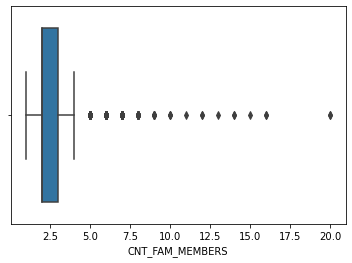

In [413]:
# Fixing the column 'CNT_FAM_MEMBERS'

sns.boxplot(a['CNT_FAM_MEMBERS'])
plt.show()

In [414]:
# 'CNT_FAM_MEMBERS' is a continuous variable with a widespread outlier, hence it can be fixed with mean/median

values=a['CNT_FAM_MEMBERS'].median()
a.loc[a['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=values
a.CNT_FAM_MEMBERS.isnull().sum()

0

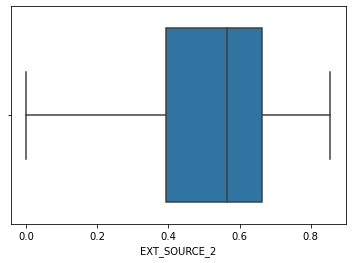

In [415]:
# Fixing the column 'EXT_SOURCE_2'

sns.boxplot(a['EXT_SOURCE_2'])
plt.show()

In [416]:
# 'EXT_SOURCE_2' is a continuous variable  without any outlier hence mean and median are almost same. Here we go with median

values=a['EXT_SOURCE_2'].median()
a.loc[a['EXT_SOURCE_2'].isnull(),'EXT_SOURCE_2']=values
a.EXT_SOURCE_2.isnull().sum()

0

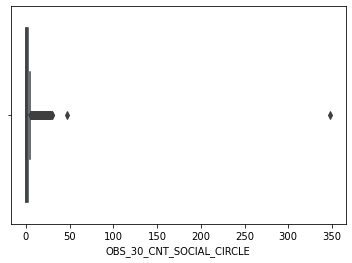

In [417]:
sns.boxplot(a['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

In [418]:
a.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [419]:
# Function for missing values in file 1

def missing(a):
    
    missingvalues_sum = a.isnull().sum()   #calculating the sum of NAs
    
    missingvalues_perc = (a.isnull().sum()*100/len(a)).round(1)  #Caculating % of NAs
    
    missing_info = pd.concat([missingvalues_sum,missingvalues_perc],axis=1) # Adding to a DF
    
    missing_info.columns = ['Total', 'NA_values %'] # Renaming columns
    
    missing_info.sort_values(by = 'NA_values %',ascending=False )
           
        # Sort the table by percentage of missing descending
        
    missing_info = missing_info[missing_info.iloc[:,1] != 0].sort_values('NA_values %', ascending=False)
    
    return missing_info

missing(a)

,Total,NA_values %
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
FLOORSMAX_MEDI,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
TOTALAREA_MODE,148431,48.3
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8


In [420]:
# Fixing 'FLOORMAX_AVG'

a['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

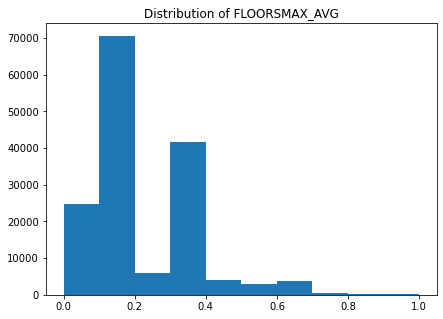

In [421]:
plt.figure(figsize=(7,5))
plt.hist(a['FLOORSMAX_AVG'],bins=10)
plt.title("Distribution of FLOORSMAX_AVG")
plt.show()

In [422]:
# Replacing Null values with mean of FLOORSMAX_AVG

a['FLOORSMAX_AVG'] = a['FLOORSMAX_AVG'].fillna(round(a['FLOORSMAX_AVG'].mean(),2))
a['FLOORSMAX_AVG'].isna().sum()

0

In [423]:
# Fixing 'FLOORMAX_AVG'

a['FLOORSMAX_MODE'].describe()

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

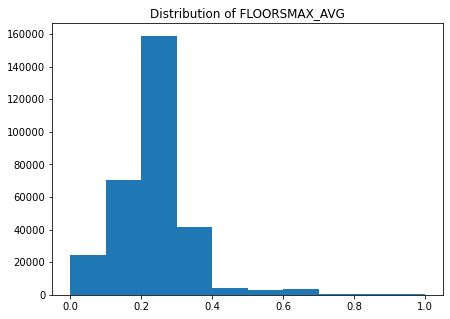

In [424]:
plt.figure(figsize=(7,5))
plt.hist(a['FLOORSMAX_AVG'],bins=10)
plt.title("Distribution of FLOORSMAX_AVG")
plt.show()

In [425]:
# Replacing Null values with mean of 'FLOORSMAX_MODE'

a['FLOORSMAX_MODE'] = a['FLOORSMAX_MODE'].fillna(round(a['FLOORSMAX_MODE'].mean(),2))
a['FLOORSMAX_MODE'].isna().sum()

0

In [426]:
# Fixing 'FLOORMAX_MEDI'

a['FLOORSMAX_MEDI'].describe()

count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64

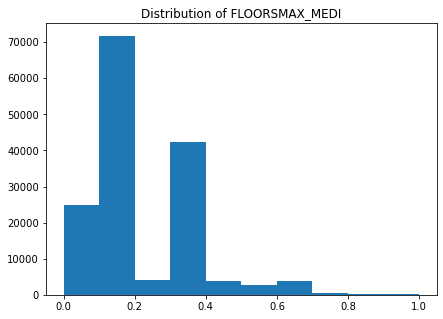

In [427]:
plt.figure(figsize=(7,5))
plt.hist(a['FLOORSMAX_MEDI'],bins=10)
plt.title("Distribution of FLOORSMAX_MEDI")
plt.show()

In [428]:
a['FLOORSMAX_MEDI'] = a['FLOORSMAX_MEDI'].fillna(round(a['FLOORSMAX_MEDI'].mean(),2))
a['FLOORSMAX_MEDI'].isna().sum()

0

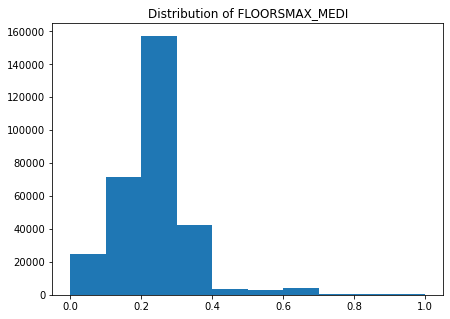

0

In [429]:
# Fixing 'FLOORMAX_MEDI'

a['FLOORSMAX_MEDI'].describe()
plt.figure(figsize=(7,5))
plt.hist(a['FLOORSMAX_MEDI'],bins=10)
plt.title("Distribution of FLOORSMAX_MEDI")
plt.show()
a['FLOORSMAX_MEDI'] = a['FLOORSMAX_MEDI']
a['FLOORSMAX_MEDI'] = a['FLOORSMAX_MEDI'].fillna(round(a['FLOORSMAX_MEDI'].mean(),2))
a['FLOORSMAX_MEDI'].isna().sum()

In [430]:
# Fixing OCCUPATION_TYPE column

a['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

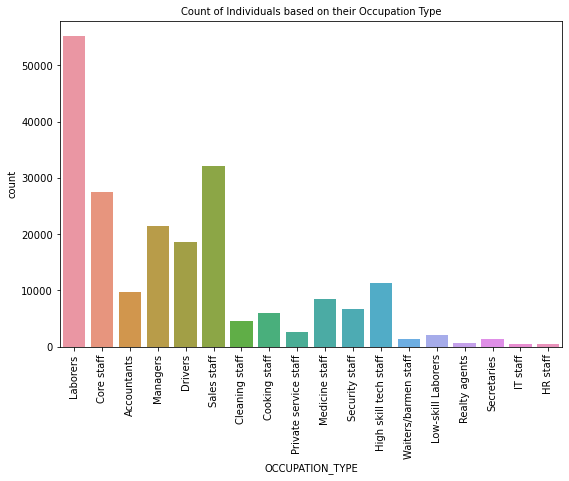

In [431]:
plt.figure(figsize=(9,6))
sns.countplot(x = 'OCCUPATION_TYPE', data=a,)
plt.title("Count of Individuals based on their Occupation Type",size=10)
plt.xticks(rotation = 90);

In [432]:
# Insights:
#    > We can see that the majority of the individuals applying for loans are labourers, Sales Staff and Core Staff
#    > HR Staff, IT Staff and Realty agents have least interest in taking loans

In [433]:
# Analysing the Occupation Type based on the Income 

average_income = pd.pivot_table(data = a,index="OCCUPATION_TYPE",aggfunc='mean')['AMT_INCOME_TOTAL']
average_income = round(average_income,2).sort_values(ascending = True)
average_income

OCCUPATION_TYPE
Cleaning staff           130790.90
Low-skill Laborers       133228.00
Cooking staff            138396.51
Waiters/barmen staff     144272.58
Security staff           149662.70
Medicine staff           149709.64
Sales staff              152302.87
Secretaries              160541.66
Laborers                 166357.48
Core staff               172656.70
Private service staff    182334.81
High skill tech staff    182842.05
Drivers                  187011.61
HR staff                 188916.28
Accountants              194578.36
Realty agents            195003.99
IT staff                 213465.60
Managers                 260336.68
Name: AMT_INCOME_TOTAL, dtype: float64

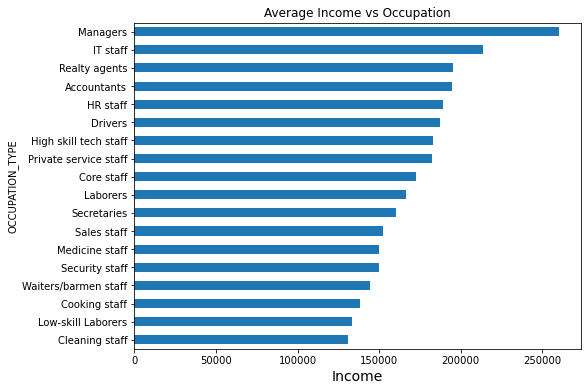

In [434]:
plt.figure(figsize=(8,6))
average_income.plot(kind = 'barh',title='Average Income vs Occupation')
plt.xlabel('Income',size=14);

In [435]:
# Insights: >The Manager salary is higher compared with Other Occcupation Types. >Cleaning Staffs recieve the least Income.

In [436]:
# Fixing the categorical columns that have null values with Mode

cols = list(set(a.columns) - set(a.describe().columns))
a[cols]= a[cols].fillna(a.mode().iloc[0])
missing(a)

,Total,NA_values %
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
TOTALAREA_MODE,148431,48.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


In [437]:
#Checking the Count of null values

null_var = a.isnull().sum()
null_var[null_var>0]

EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
dtype: int64

In [438]:
# Since these are numerical columns, we will impute them with Mean

a["EXT_SOURCE_3"] = a["EXT_SOURCE_3"].fillna(a["EXT_SOURCE_3"].mean())
a["YEARS_BEGINEXPLUATATION_AVG"] = a["YEARS_BEGINEXPLUATATION_AVG"].fillna(a["YEARS_BEGINEXPLUATATION_AVG"].mean())
a["YEARS_BEGINEXPLUATATION_MODE"] = a["YEARS_BEGINEXPLUATATION_MODE"].fillna(a["YEARS_BEGINEXPLUATATION_MODE"].mean())
a["YEARS_BEGINEXPLUATATION_MEDI"] = a["YEARS_BEGINEXPLUATATION_MEDI"].fillna(a["YEARS_BEGINEXPLUATATION_MEDI"].mean())
a["TOTALAREA_MODE"] = a["TOTALAREA_MODE"].fillna(a["TOTALAREA_MODE"].mean())
a["OBS_30_CNT_SOCIAL_CIRCLE"] = a["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(a["OBS_30_CNT_SOCIAL_CIRCLE"].mean())
a["DEF_30_CNT_SOCIAL_CIRCLE"] = a["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(a["DEF_30_CNT_SOCIAL_CIRCLE"].mean())
a["OBS_60_CNT_SOCIAL_CIRCLE"] = a["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(a["OBS_60_CNT_SOCIAL_CIRCLE"].mean())
a["DEF_60_CNT_SOCIAL_CIRCLE"] = a["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(a["DEF_60_CNT_SOCIAL_CIRCLE"].mean())
a["DAYS_LAST_PHONE_CHANGE"] = a["DAYS_LAST_PHONE_CHANGE"].fillna(a["DAYS_LAST_PHONE_CHANGE"].mean())
a["AMT_REQ_CREDIT_BUREAU_HOUR"] = a["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(a["AMT_REQ_CREDIT_BUREAU_HOUR"].mean())
a["AMT_REQ_CREDIT_BUREAU_DAY"] = a["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(a["AMT_REQ_CREDIT_BUREAU_DAY"].mean())
a["AMT_REQ_CREDIT_BUREAU_WEEK"] = a["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(a["AMT_REQ_CREDIT_BUREAU_WEEK"].mean())
a["AMT_REQ_CREDIT_BUREAU_MON"] = a["AMT_REQ_CREDIT_BUREAU_MON"].fillna(a["AMT_REQ_CREDIT_BUREAU_MON"].mean())
a["AMT_REQ_CREDIT_BUREAU_QRT"] = a["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(a["AMT_REQ_CREDIT_BUREAU_QRT"].mean())
a["AMT_REQ_CREDIT_BUREAU_YEAR"] = a["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(a["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())

null_var = a.isnull().sum()
null_var[null_var>0]

Series([], dtype: int64)

In [439]:
missing(a).index

Index([], dtype='object')

In [440]:
## File 1 is clean and free of null values

In [441]:
# Checking for Duplicated rows in file 1

a[a.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [442]:
# Analysing NAME_CONTRACT_TYPE
#Checking the Loan type and its count

a['NAME_CONTRACT_TYPE'].value_counts() 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

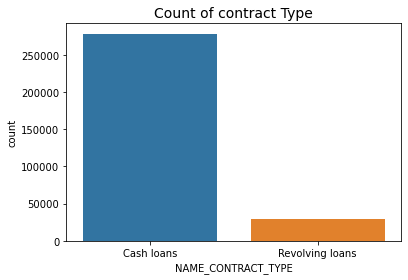

In [443]:
sns.countplot(a['NAME_CONTRACT_TYPE'])
plt.title('Count of contract Type',size=14)
plt.show()


In [444]:
## Insight - More loans were given as Cash Loans

In [445]:
# Analysing the Income info of the applicants

a['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

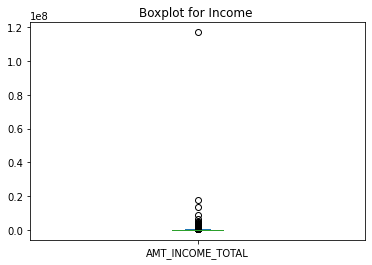

In [446]:
a['AMT_INCOME_TOTAL'].plot(kind = 'box')
plt.title("Boxplot for Income ")
plt.show() 

In [447]:
# The AMT Income Total is afftected by Outliers - We need to treat them
# Calculating the Quartiles and IQR for AMT_INCOME_TOTAL

Q1=a['AMT_INCOME_TOTAL'].quantile(0.25)
Q3=a['AMT_INCOME_TOTAL'].quantile(0.75)

IQR=Q3-Q1

print("Q1 is " + str(Q1))
print("Q3 is " + str(Q3))
print("IQR is " + str(IQR))

Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

print("Lower_Whisker is " + str(Lower_Whisker)," and   Upper_Whisker is " + str(Upper_Whisker))

Q1 is 112500.0
Q3 is 202500.0
IQR is 90000.0
Lower_Whisker is -22500.0  and   Upper_Whisker is 337500.0


In [448]:
# Removing the values that are greater than Upper Whisker

a = a[a['AMT_INCOME_TOTAL']< Upper_Whisker] 

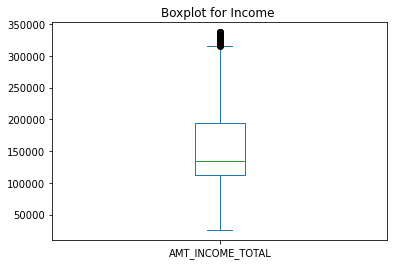

In [449]:
# Plotting after removing the Outliers

a['AMT_INCOME_TOTAL'].plot(kind = 'box') 
plt.title("Boxplot for Income ")
plt.show()

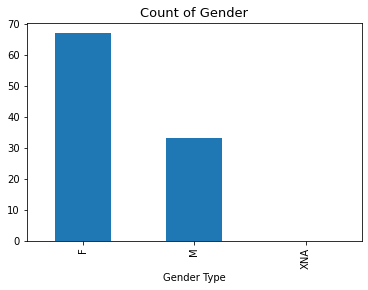

In [450]:
# Checking the Gender info 

gender_info = a['CODE_GENDER'].value_counts(normalize=True)*100
gender_info.plot(kind = 'bar')
plt.title("Count of Gender", size = 13)
plt.xlabel("Gender Type")
plt.show()  

# Insight 65% of loans are taken by Females, followed by males at 34 % and less than 1% for XNA

In [451]:
# Analysing thhe Income Type of the individuals

a['NAME_INCOME_TYPE'].value_counts()

Working                 152768
Commercial associate     64450
Pensioner                54123
State servant            20299
Unemployed                  21
Student                     17
Businessman                  4
Maternity leave              4
Name: NAME_INCOME_TYPE, dtype: int64

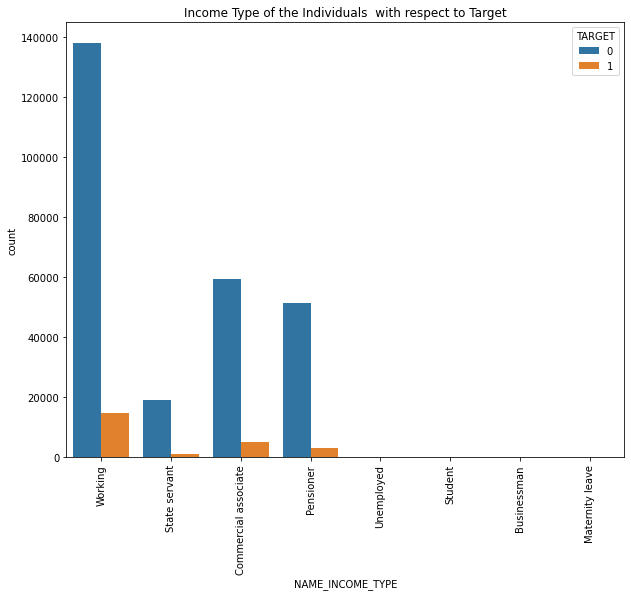

In [452]:
# Comparing the Income Type of the Individuals  with respect to Target

plt.figure(figsize=(10,8))
sns.countplot(x = 'NAME_INCOME_TYPE',data=a,hue = 'TARGET')
plt.title("Income Type of the Individuals  with respect to Target")
plt.xticks(rotation = 90)
plt.show()

In [453]:
# Insight:
#    > We can see that more loans are given to those who are Working, followed by commercial Assct and Pensioner
#    > Least loans are provided or taken by Students, Businessman and who are unemployed

In [454]:
#Analysing the AMT_GOODS_PRICE

a['AMT_GOODS_PRICE'].describe()

count    2.916860e+05
mean     5.181958e+05
std      3.497966e+05
min      4.050000e+04
25%      2.295000e+05
50%      4.500000e+05
75%      6.750000e+05
max      3.555000e+06
Name: AMT_GOODS_PRICE, dtype: float64

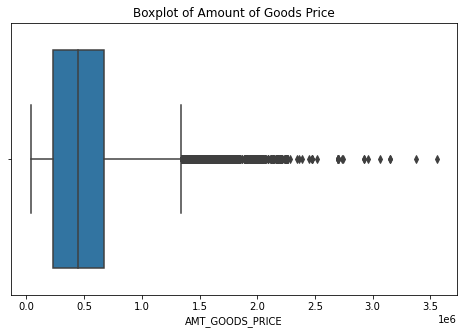

In [455]:
plt.figure(figsize=(8,5))
sns.boxplot(a['AMT_GOODS_PRICE'])
plt.title("Boxplot of Amount of Goods Price")
plt.show()

In [456]:
AMT_GOODS_PRICE_Q1 =a['AMT_GOODS_PRICE'].quantile(0.25)
AMT_GOODS_PRICE_Q3=a['AMT_GOODS_PRICE'].quantile(0.75)

IQR_AMT_GOODS_PRICE=AMT_GOODS_PRICE_Q3 - AMT_GOODS_PRICE_Q1

print("AMT_GOODS_PRICE Q1 = " + str(AMT_GOODS_PRICE_Q1))
print("AMT_GOODS_PRICE Q3 = " + str(AMT_GOODS_PRICE_Q3))
print("IQR_AMT_GOODS_PRICE = " + str(IQR_AMT_GOODS_PRICE))

Lower_Whisker = AMT_GOODS_PRICE_Q1- 1.5*IQR_AMT_GOODS_PRICE
Upper_Whisker = Q3 + 1.5*IQR

print("Lower_Whisker is " + str(Lower_Whisker)," and   Upper_Whisker is " + str(Upper_Whisker))

AMT_GOODS_PRICE Q1 = 229500.0
AMT_GOODS_PRICE Q3 = 675000.0
IQR_AMT_GOODS_PRICE = 445500.0
Lower_Whisker is -438750.0  and   Upper_Whisker is 337500.0


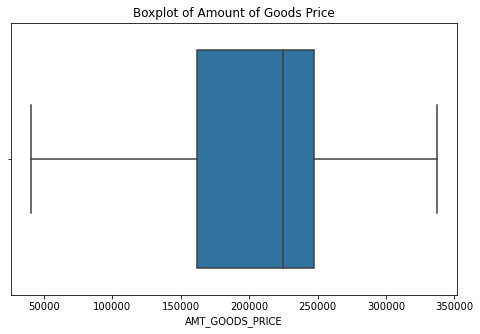

In [457]:
# Removing the values that are greater than Upper Whisker

a = a[a['AMT_GOODS_PRICE']< Upper_Whisker] 

plt.figure(figsize=(8,5))
sns.boxplot(a['AMT_GOODS_PRICE'])
plt.title("Boxplot of Amount of Goods Price")
plt.show()

In [458]:
# Analysing the Credit amount of the loan info of the applicants

a['AMT_CREDIT'].describe()

count    111379.000000
mean     235759.502141
std       80084.472803
min       45000.000000
25%      180000.000000
50%      247275.000000
75%      284400.000000
max      675000.000000
Name: AMT_CREDIT, dtype: float64

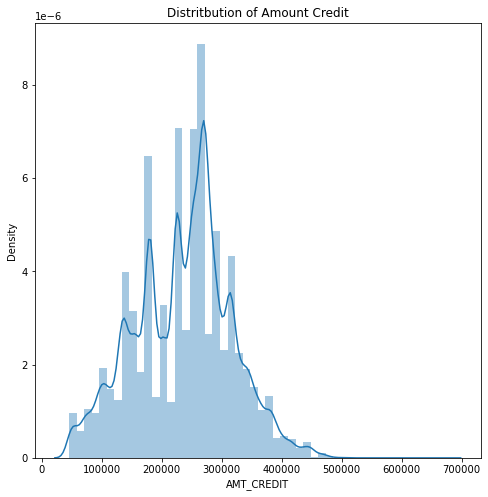

In [459]:
#plotting the Amount issued to the appicants

plt.figure(figsize=(8,8))
sns.distplot(a['AMT_CREDIT'])
plt.title("Distritbution of Amount Credit")
plt.show() 

In [460]:
# Insight:
#     > The AMT_CREDIT column is positively skewed

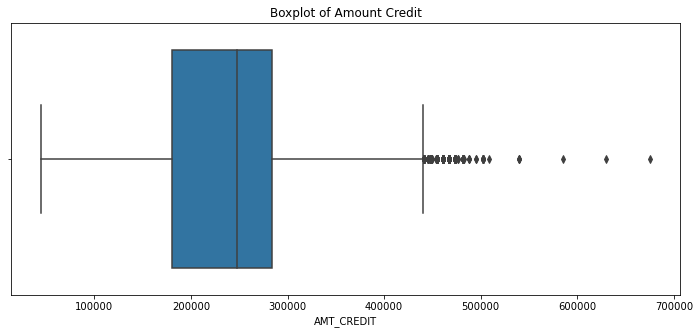

In [461]:
#plotting the Amount issued to the appicants in boxplot to check for Outliers

plt.figure(figsize=(12,5))
sns.boxplot(a['AMT_CREDIT'])
plt.title("Boxplot of Amount Credit")
plt.show()

In [462]:
# Calculating the Quartiles and IQR for AMT_CREDIT

AMT_CREDIT_Q1=a['AMT_CREDIT'].quantile(0.25)
AMT_CREDIT_Q3=a['AMT_CREDIT'].quantile(0.75)

AMT_CREDIT_IQR = AMT_CREDIT_Q3 - AMT_CREDIT_Q1

print("AMT_CREDIT_Q1 = " + str(AMT_CREDIT_Q1))
print("AMT_CREDIT_Q3 = " + str(AMT_CREDIT_Q3))
print("AMT_CREDIT_IQR = " + str(AMT_CREDIT_IQR))

Lower_Whisker = AMT_CREDIT_Q1- 1.5*AMT_CREDIT_IQR
Upper_Whisker = AMT_CREDIT_Q3 + 1.5*AMT_CREDIT_IQR

print("Lower_Whisker is " + str(Lower_Whisker)," and   Upper_Whisker is " + str(Upper_Whisker))

AMT_CREDIT_Q1 = 180000.0
AMT_CREDIT_Q3 = 284400.0
AMT_CREDIT_IQR = 104400.0
Lower_Whisker is 23400.0  and   Upper_Whisker is 441000.0


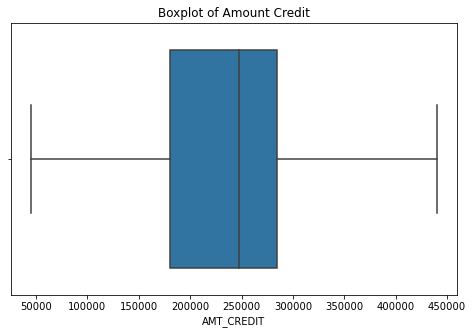

In [463]:
# Removing the values that are greater than Upper Whisker

a = a[a['AMT_CREDIT']< Upper_Whisker] 

# Plotting after removing the Outliers

plt.figure(figsize=(8,5))
sns.boxplot(a['AMT_CREDIT'])
plt.title("Boxplot of Amount Credit")
plt.show()

In [464]:
# Analysing the DAYS_BIRTH column

a['DAYS_BIRTH'].head()

# Converting negative values to positive

a.DAYS_BIRTH.abs()

2         19046
3         19005
11        20417
12        13439
15         8728
          ...  
307504    16705
307505    24384
307506     9327
307507    20775
307509    11961
Name: DAYS_BIRTH, Length: 110786, dtype: int64

In [465]:
# Changing the days format to years

a['DAYS_BIRTH'] = a['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))

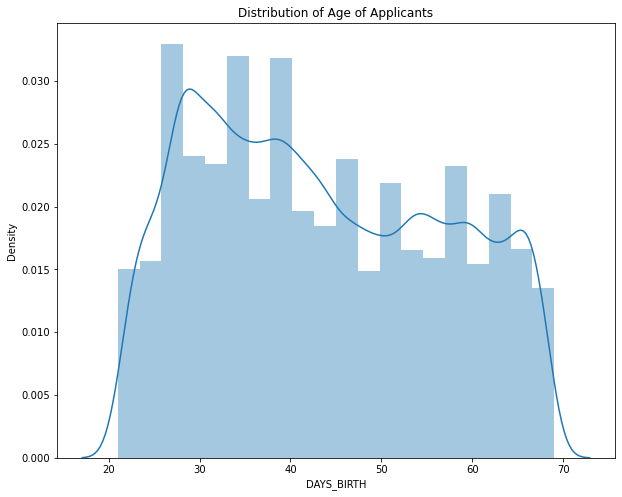

In [466]:
plt.figure(figsize=(10,8))
sns.distplot(a['DAYS_BIRTH'],bins = 20)
plt.title("Distribution of Age of Applicants")
plt.show()

In [467]:
# Insights:
#    > Most of the Applicants are in between the age of 27 and 50

In [468]:
# Analysing the Education Type of the Applicants

a['NAME_EDUCATION_TYPE'].head()

2     Secondary / secondary special
3     Secondary / secondary special
11    Secondary / secondary special
12    Secondary / secondary special
15    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

In [469]:
a['NAME_EDUCATION_TYPE'].value_counts().index

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object')

In [470]:
#Creating a dictionary to convert Categories for better naming

Education  = {'Secondary / secondary special':'Secondary', 'Higher education':'Higher Edu','Incomplete higher' :"Inc Higher", 'Lower secondary':'Lower secondary', 'Academic degree':'Degree'}

In [471]:
# Changing the Education Type as per the new name

a['NAME_EDUCATION_TYPE'] = a['NAME_EDUCATION_TYPE'].map(Education)

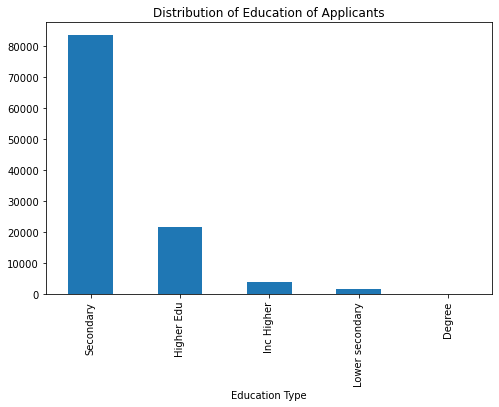

In [472]:
plt.figure(figsize=(8,5))
a['NAME_EDUCATION_TYPE'].value_counts().plot(kind = 'bar')
plt.title("Distribution of Education of Applicants")
plt.xlabel("Education Type")
plt.show()

In [473]:
# Insights:
#    > Most applicants are from secondary education and the least is from degree education

In [474]:
# Analysing the Target Variable

a['TARGET'].head() 

2     0
3     0
11    0
12    0
15    0
Name: TARGET, dtype: int64

In [475]:
a['TARGET'].value_counts()

0    101820
1      8966
Name: TARGET, dtype: int64

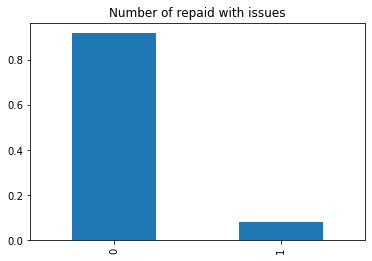

In [476]:
a['TARGET'].value_counts(normalize = True).plot(kind = 'bar')
plt.title("Number of repaid with issues")
plt.show()

In [477]:
# Insights:
#   > This dataset has details of applicants who repaid more than who had issues in repayment of loans
#   > Hence we can understand that this is an imbalanced dataset
#   > We need to analyse the data after splitting it based on 0's and 1's

In [478]:
#Client paying on time

(a['TARGET']==0).sum()

101820

In [479]:
#client with payment difficulties

(a['TARGET']==1).sum()

8966

In [480]:
a['TARGET'].sample(5)

262607    0
37776     0
92559     0
39428     0
195338    0
Name: TARGET, dtype: int64

In [481]:
a['TARGET'].value_counts()

0    101820
1      8966
Name: TARGET, dtype: int64

In [482]:
# Ratio for imbalance client paying on time : client with payment difficulties

Ratio_of_repaid_with_issue = (a['TARGET']==0).sum() / (a['TARGET']==1).sum()
Ratio_of_repaid_with_issue = round(Ratio_of_repaid_with_issue)
Ratio_of_repaid_with_issue

11

In [483]:
# The Ratio between the Repayments and the issue payments is  11

In [528]:
## Seperating them as 0's and 1's

train_0 = a.loc[a['TARGET'] == 0 ]
train_1 = a.loc[a['TARGET'] == 1 ]

In [529]:
# Categorical columns are: 

categorical_col = list(set(a.columns) - set(a.describe().columns))
categorical_col

['FLAG_OWN_REALTY',
 'NAME_FAMILY_STATUS',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_CAR',
 'ORGANIZATION_TYPE',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE']

In [530]:
# Numerical columns

numerical_col = a.describe().columns
numerical_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

In [531]:
len(numerical_col)

68

In [532]:
#Univariate analysis

def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1=plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x=column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    
    ax3 = plt.subplot(223)
    a=pd.DataFrame()
    
    
    a['0'] = ((train_0[col].value_counts())/len(train_0))
    a['1'] = ((train_1[col].value_counts())/len(train_1))
    a.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    
    fig.tight_layout() #or equivalently, "plt.tight_Layout()"
    
    plt.show()
    

In [533]:
#string values are categorical values

train_categorical = a.select_dtypes(include =['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [534]:
# Univariate analysis of the categorical data

for column in train_categorical:
    print("Plotting ", column)
    

Plotting  NAME_CONTRACT_TYPE
Plotting  CODE_GENDER
Plotting  FLAG_OWN_CAR
Plotting  FLAG_OWN_REALTY
Plotting  NAME_TYPE_SUITE
Plotting  NAME_INCOME_TYPE
Plotting  NAME_EDUCATION_TYPE
Plotting  NAME_FAMILY_STATUS
Plotting  NAME_HOUSING_TYPE
Plotting  OCCUPATION_TYPE
Plotting  WEEKDAY_APPR_PROCESS_START
Plotting  ORGANIZATION_TYPE
Plotting  EMERGENCYSTATE_MODE


Plotting  NAME_CONTRACT_TYPE


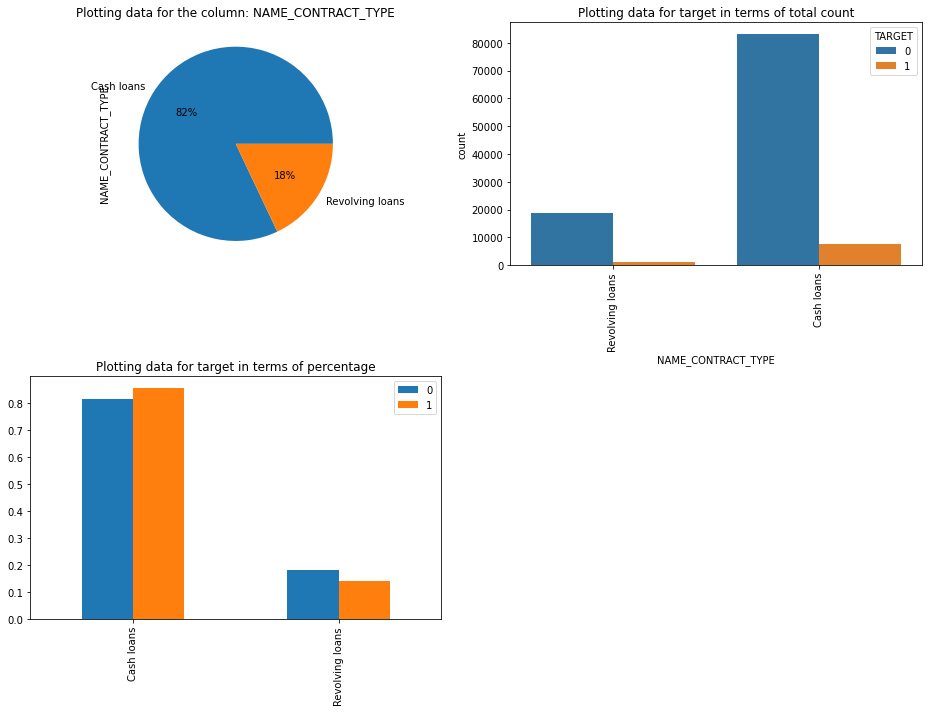

Plotting  CODE_GENDER


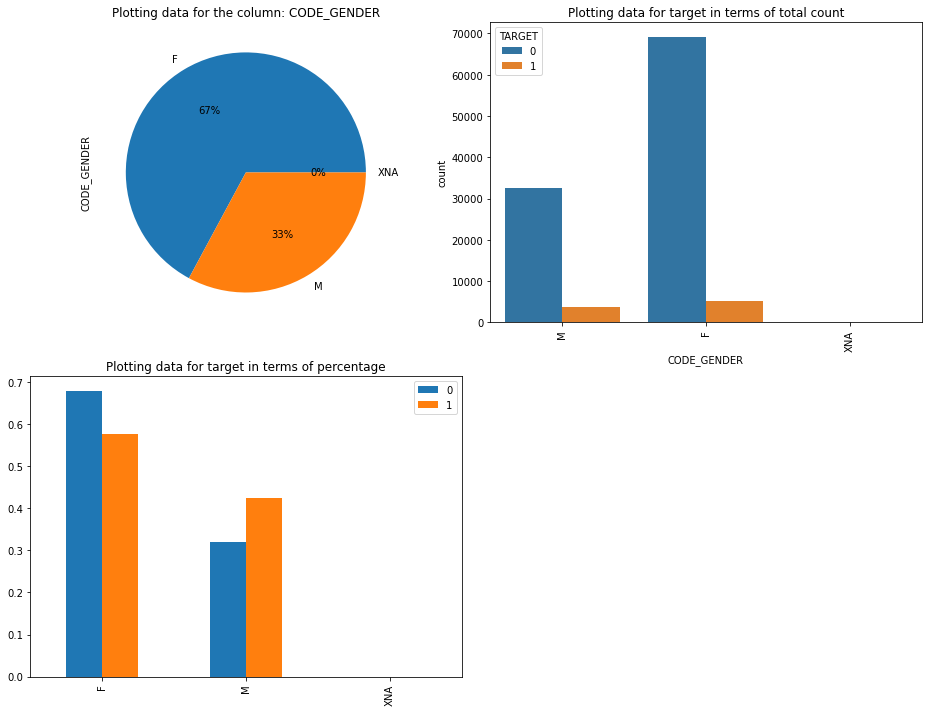

Plotting  FLAG_OWN_CAR


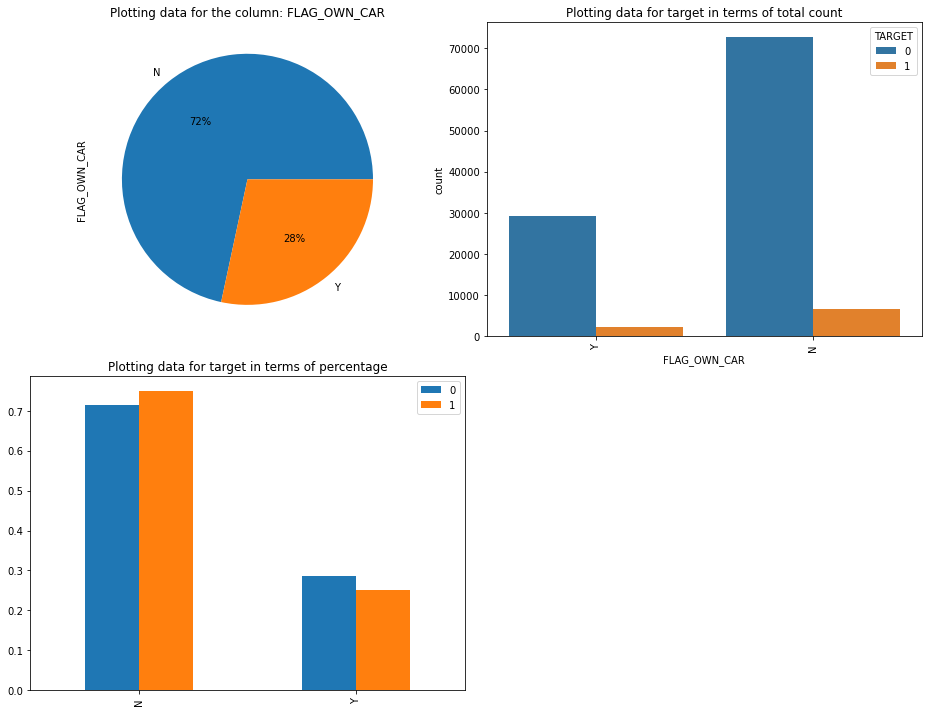

Plotting  FLAG_OWN_REALTY


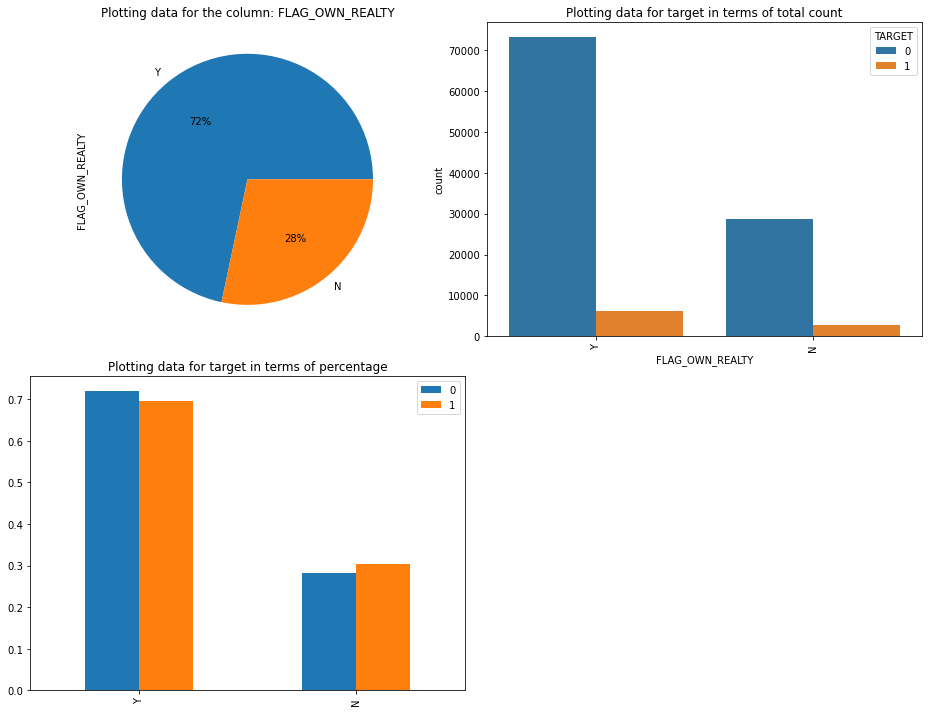

Plotting  NAME_TYPE_SUITE


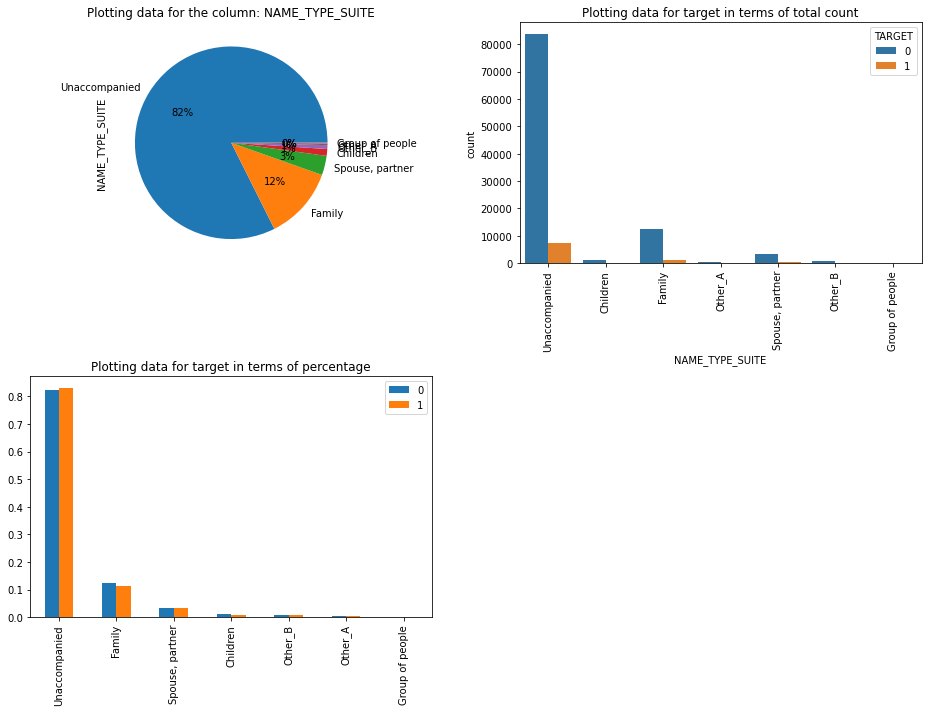

Plotting  NAME_INCOME_TYPE


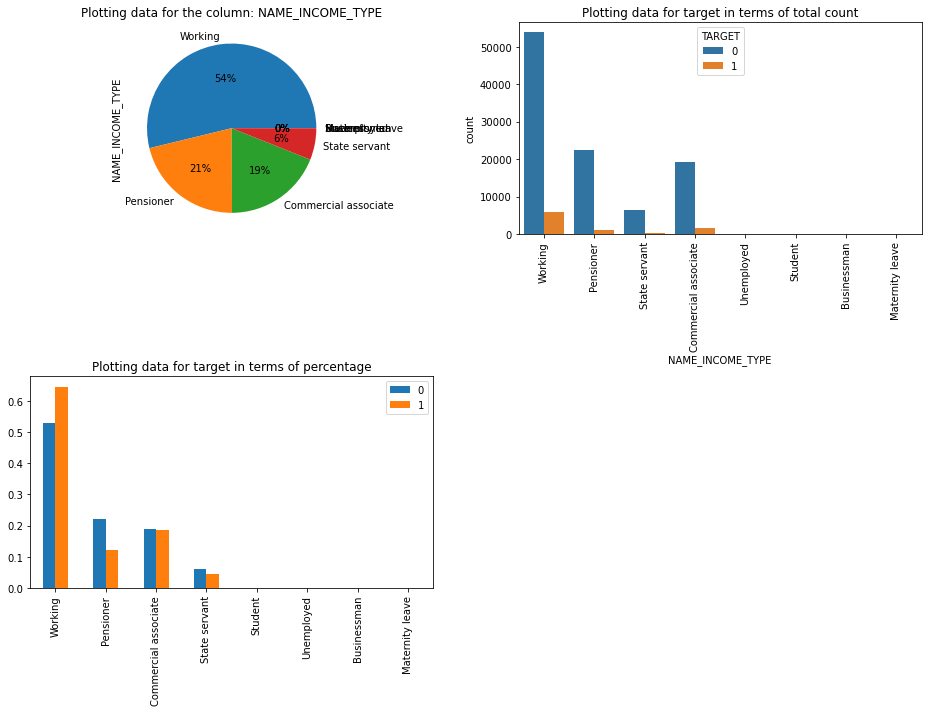

Plotting  NAME_EDUCATION_TYPE


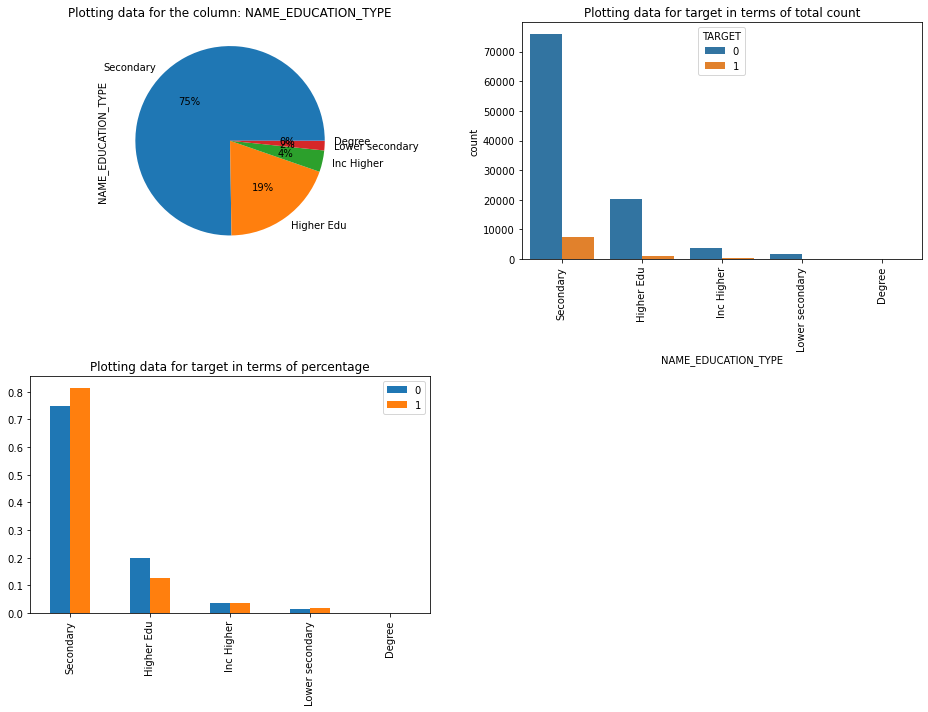

Plotting  NAME_FAMILY_STATUS


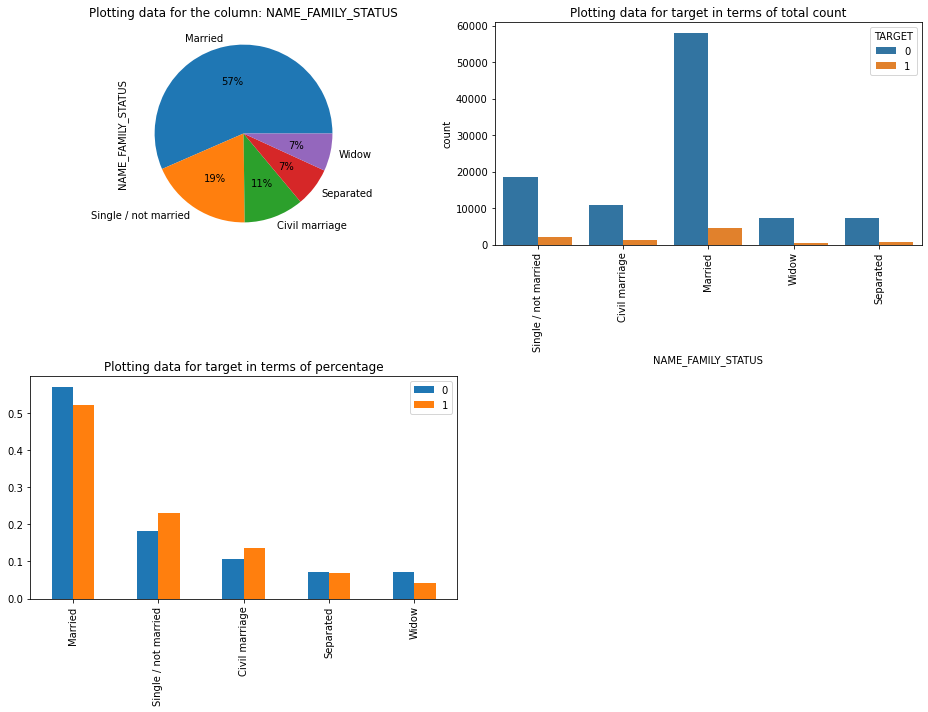

Plotting  NAME_HOUSING_TYPE


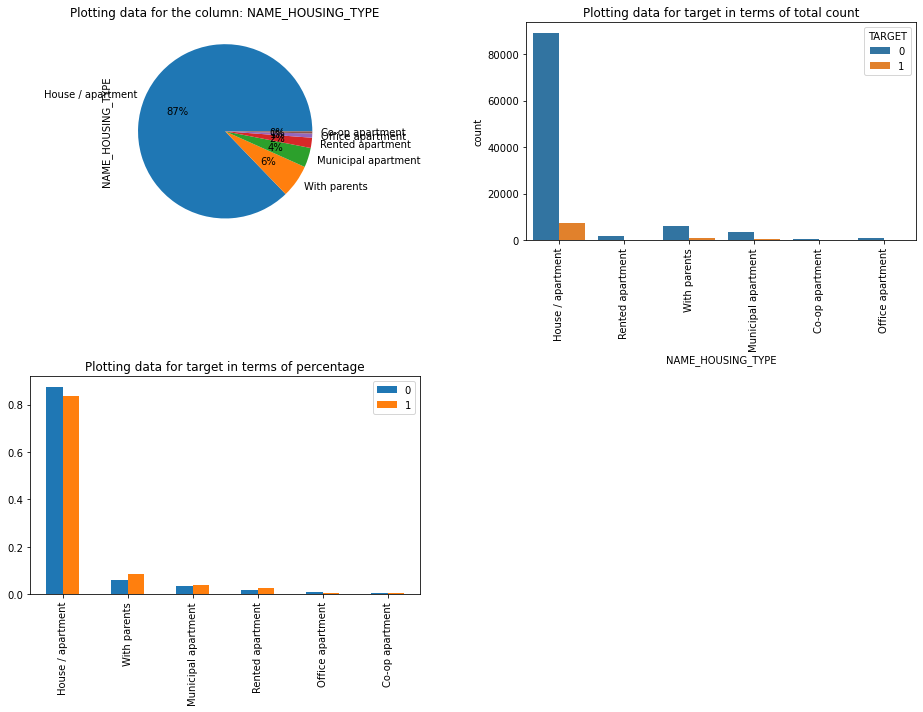

Plotting  OCCUPATION_TYPE


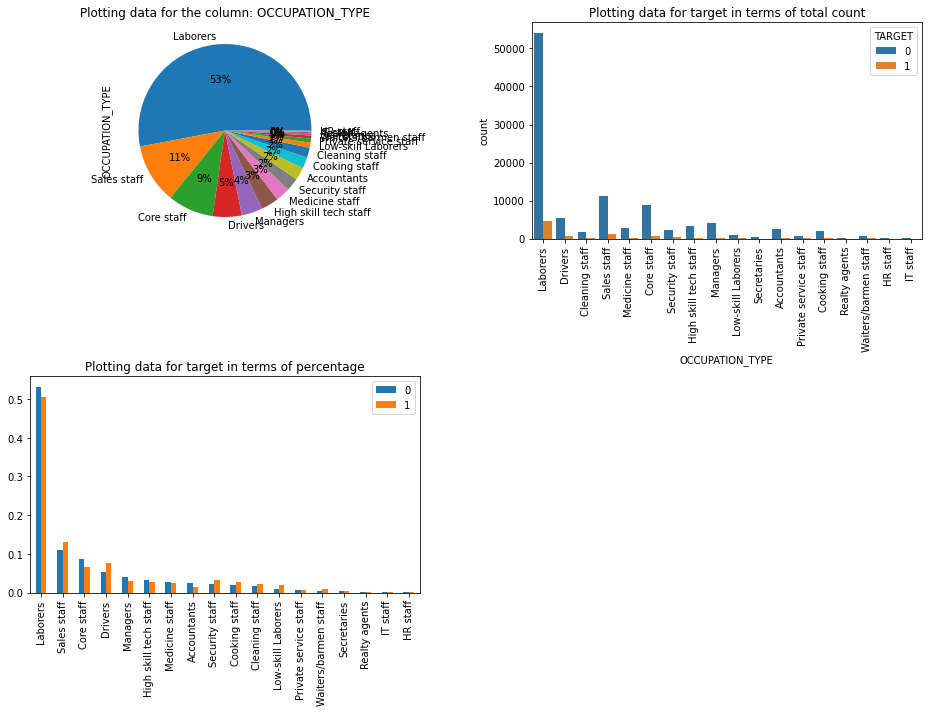

Plotting  WEEKDAY_APPR_PROCESS_START


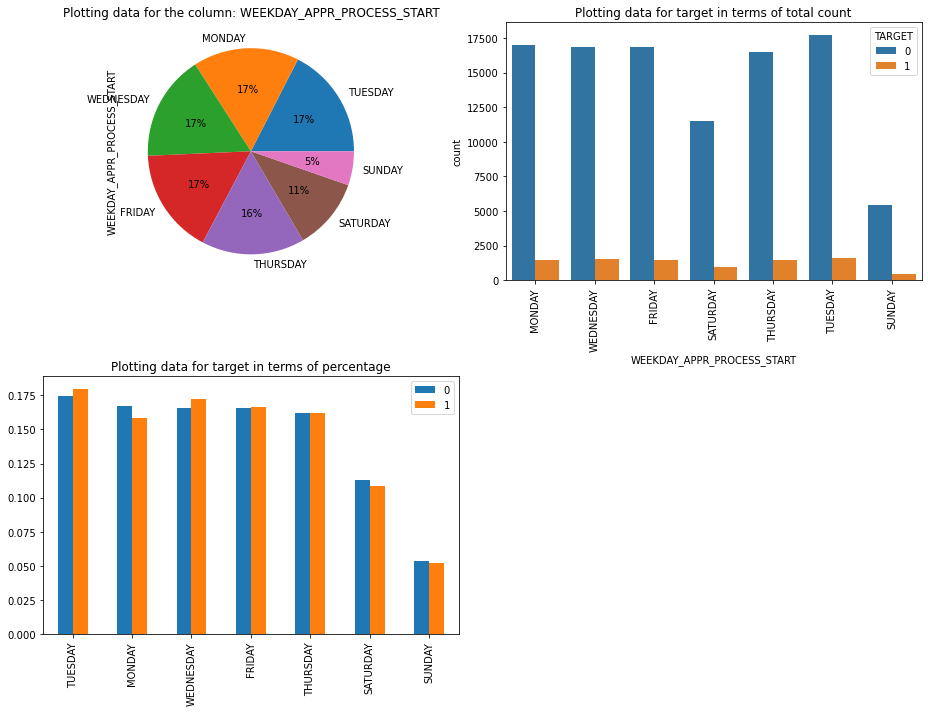

Plotting  ORGANIZATION_TYPE


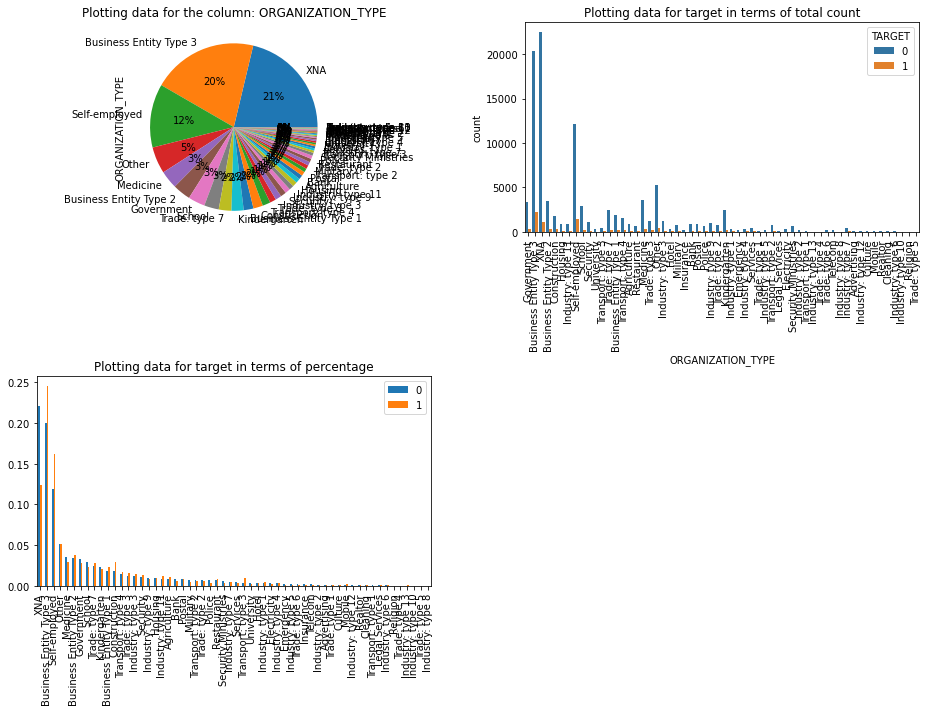

Plotting  EMERGENCYSTATE_MODE


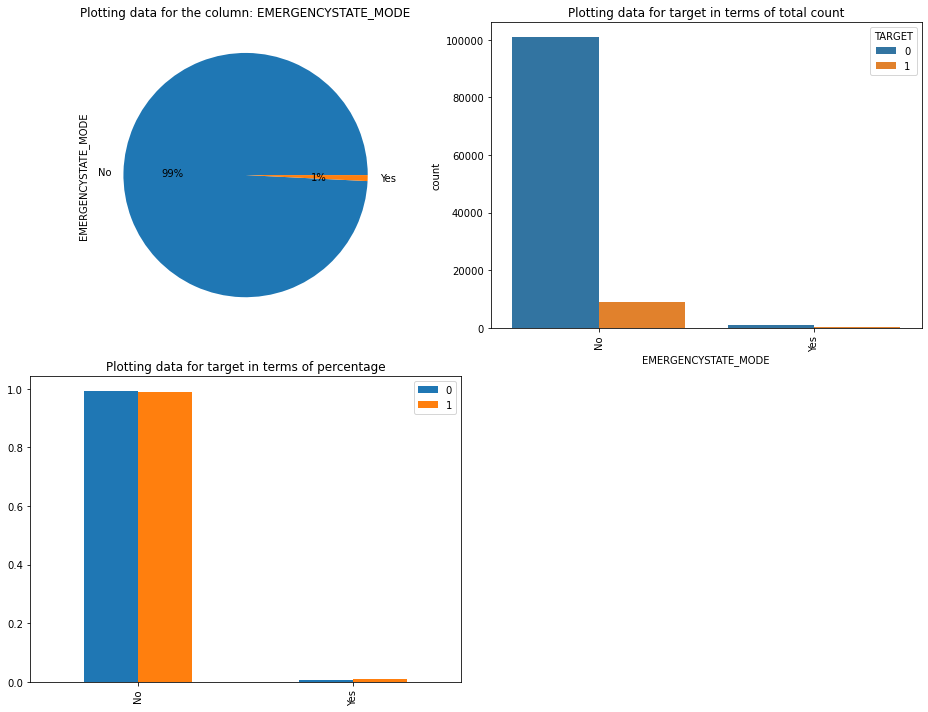

In [552]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(a, train_0, train_1, column)

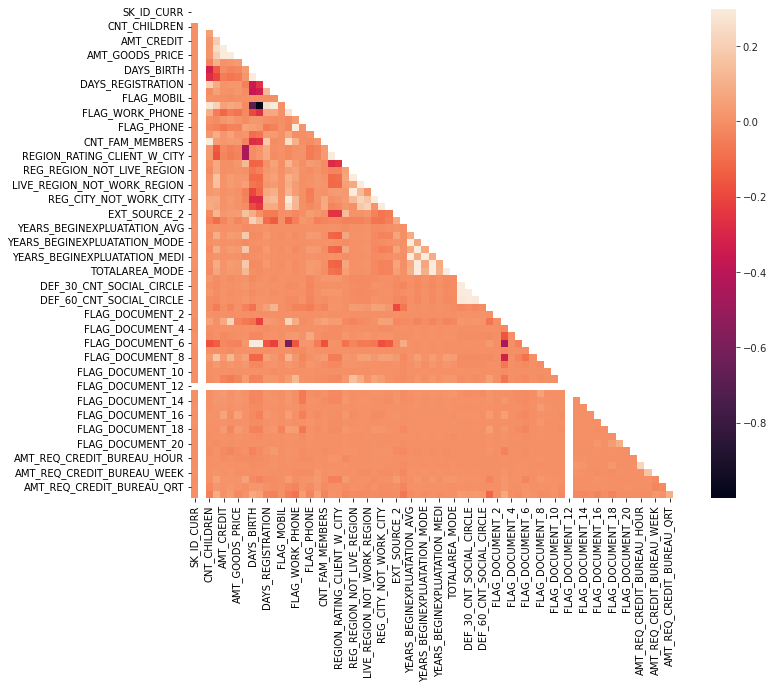

In [527]:
# Correlation between variables

corr = train_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True   #automatically mask or hide
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax = 0.3, square = True);

In [538]:
# Top 10 correlations separate for train0 and train1

train_0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.002220,0.002278,0.003311,0.002968,0.003964,0.001756,0.000319,0.001089,...,0.000329,0.003611,-0.001980,-0.001034,0.000049,-0.000796,0.000941,-0.000792,0.003561,0.001498
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.002220,NaN,1.000000,0.041433,0.012189,0.015644,0.010652,-0.032407,-0.327884,-0.275883,...,0.002693,-0.004562,-0.001412,-0.005170,-0.000149,0.000850,0.001851,-0.003148,-0.017254,-0.048143
AMT_INCOME_TOTAL,0.002278,NaN,0.041433,1.000000,0.189584,0.253541,0.201410,0.104177,-0.144643,-0.206803,...,0.000486,0.004864,-0.004687,0.007979,0.005679,0.004389,0.011772,0.055477,0.023328,0.087403
AMT_CREDIT,0.003311,NaN,0.012189,0.189584,1.000000,0.574490,0.929131,0.010234,-0.006860,-0.052360,...,0.033130,0.009590,0.005450,-0.015512,-0.007204,0.006506,0.005111,0.012109,0.011476,0.005083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.000796,NaN,0.000850,0.004389,0.006506,0.001483,0.003575,0.003061,-0.004751,-0.001037,...,0.017358,-0.001115,-0.000437,-0.001568,0.220871,1.000000,0.166206,0.000513,-0.003830,-0.006789
AMT_REQ_CREDIT_BUREAU_WEEK,0.000941,NaN,0.001851,0.011772,0.005111,0.013380,0.000391,-0.003667,-0.002239,0.001321,...,-0.007209,0.003363,-0.001173,-0.000453,-0.001513,0.166206,1.000000,-0.011485,-0.025352,0.019685
AMT_REQ_CREDIT_BUREAU_MON,-0.000792,NaN,-0.003148,0.055477,0.012109,0.013412,0.013136,0.052355,-0.013086,-0.034866,...,-0.000500,-0.000880,-0.002042,-0.003959,-0.001523,0.000513,-0.011485,1.000000,-0.011918,0.002568
AMT_REQ_CREDIT_BUREAU_QRT,0.003561,NaN,-0.017254,0.023328,0.011476,0.016092,0.006703,-0.002681,0.020550,0.023647,...,-0.001886,-0.001997,0.002832,-0.003274,-0.002855,-0.003830,-0.025352,-0.011918,1.000000,0.094048


In [ ]:
# Insights:
#    We observe negative correlation as there are negative values 
#    Find top 10 correlations

In [539]:
# Absolute values for further analysis

train_0.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.002220,0.002278,0.003311,0.002968,0.003964,0.001756,0.000319,0.001089,...,0.000329,0.003611,0.001980,0.001034,0.000049,0.000796,0.000941,0.000792,0.003561,0.001498
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.002220,NaN,1.000000,0.041433,0.012189,0.015644,0.010652,0.032407,0.327884,0.275883,...,0.002693,0.004562,0.001412,0.005170,0.000149,0.000850,0.001851,0.003148,0.017254,0.048143
AMT_INCOME_TOTAL,0.002278,NaN,0.041433,1.000000,0.189584,0.253541,0.201410,0.104177,0.144643,0.206803,...,0.000486,0.004864,0.004687,0.007979,0.005679,0.004389,0.011772,0.055477,0.023328,0.087403
AMT_CREDIT,0.003311,NaN,0.012189,0.189584,1.000000,0.574490,0.929131,0.010234,0.006860,0.052360,...,0.033130,0.009590,0.005450,0.015512,0.007204,0.006506,0.005111,0.012109,0.011476,0.005083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.000796,NaN,0.000850,0.004389,0.006506,0.001483,0.003575,0.003061,0.004751,0.001037,...,0.017358,0.001115,0.000437,0.001568,0.220871,1.000000,0.166206,0.000513,0.003830,0.006789
AMT_REQ_CREDIT_BUREAU_WEEK,0.000941,NaN,0.001851,0.011772,0.005111,0.013380,0.000391,0.003667,0.002239,0.001321,...,0.007209,0.003363,0.001173,0.000453,0.001513,0.166206,1.000000,0.011485,0.025352,0.019685
AMT_REQ_CREDIT_BUREAU_MON,0.000792,NaN,0.003148,0.055477,0.012109,0.013412,0.013136,0.052355,0.013086,0.034866,...,0.000500,0.000880,0.002042,0.003959,0.001523,0.000513,0.011485,1.000000,0.011918,0.002568
AMT_REQ_CREDIT_BUREAU_QRT,0.003561,NaN,0.017254,0.023328,0.011476,0.016092,0.006703,0.002681,0.020550,0.023647,...,0.001886,0.001997,0.002832,0.003274,0.002855,0.003830,0.025352,0.011918,1.000000,0.094048


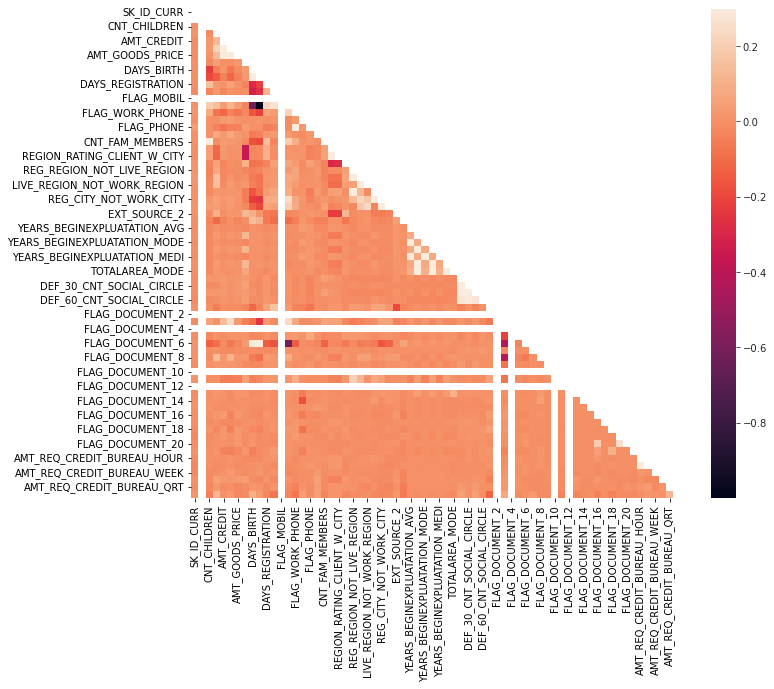

In [540]:
# Heatmap for train_1

corr = train_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True   #automatically mask or hide
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax = 0.3, square = True);

In [541]:
correlation_1 = train_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind = 'quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]
print(correlation_1.tail(10))

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998078
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998078
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.999758
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.999758
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.999766
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.999766
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999916
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999916
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.999980
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.999980
dtype: float64


In [543]:
# Outlier analysis
# Analysing data using box plot for numerical data 

train_numerical = a.select_dtypes(include = ['int64', 'float64']).columns
train_numerical


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

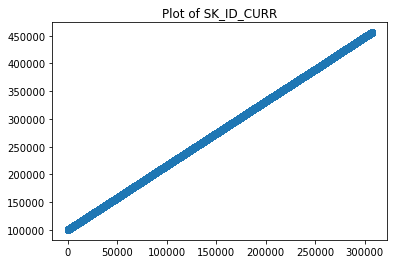

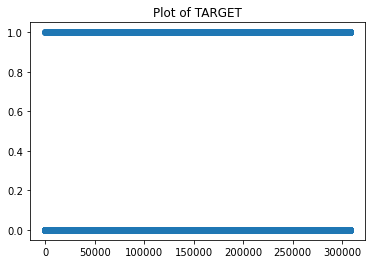

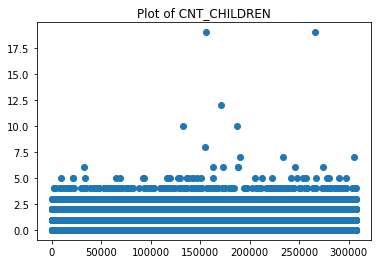

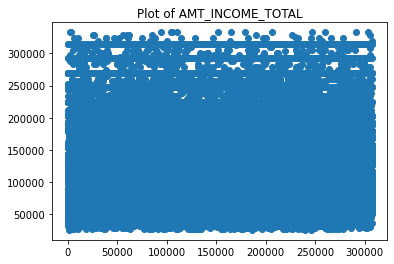

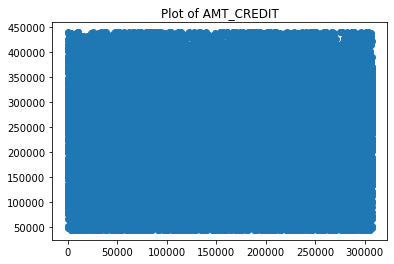

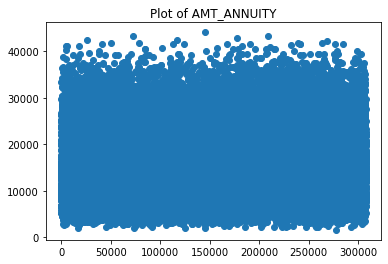

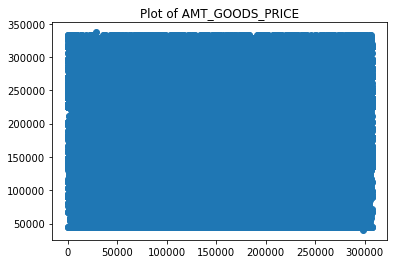

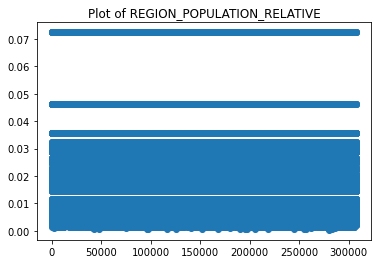

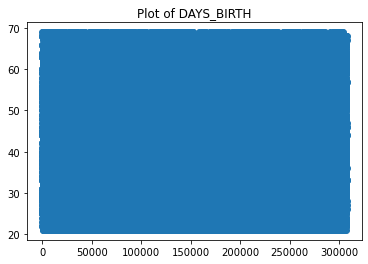

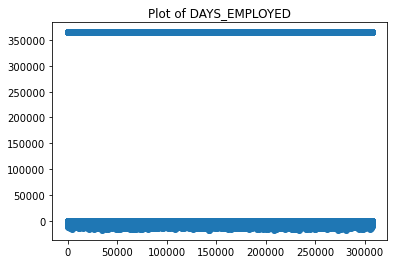

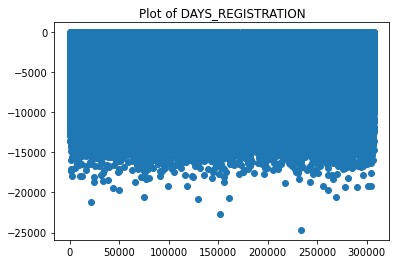

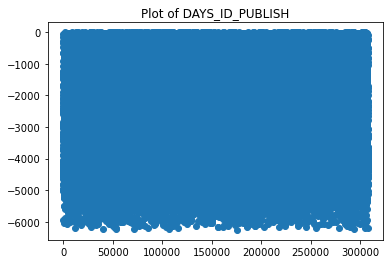

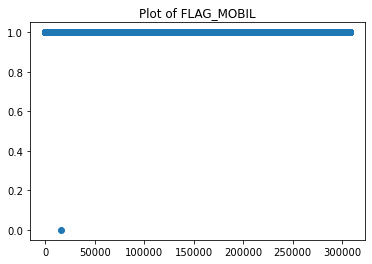

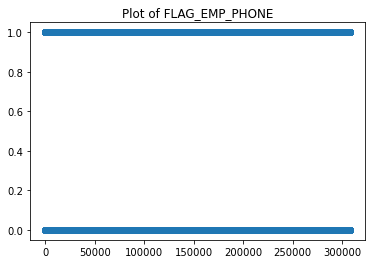

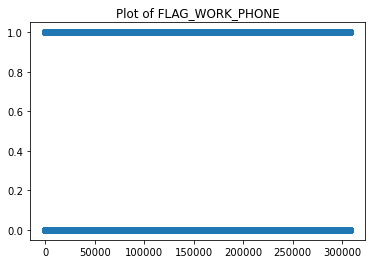

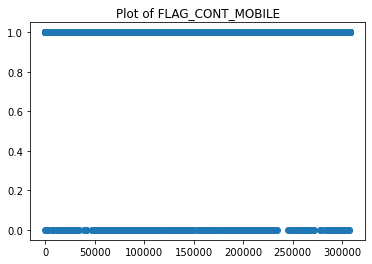

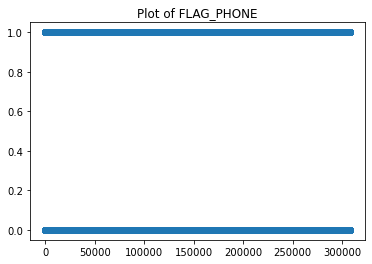

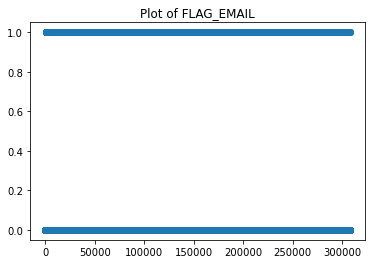

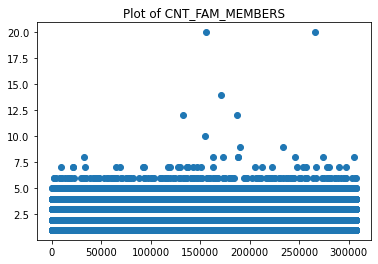

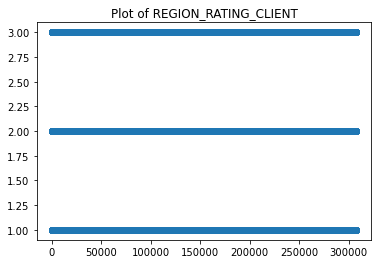

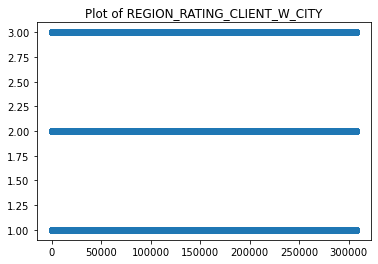

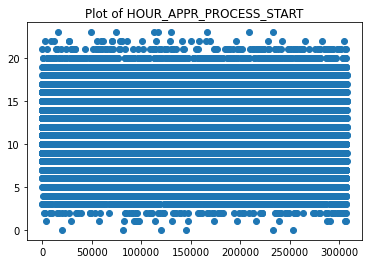

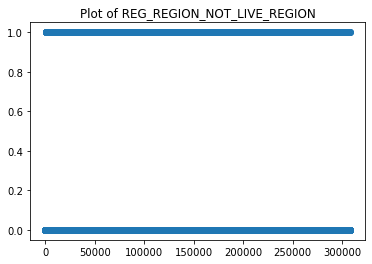

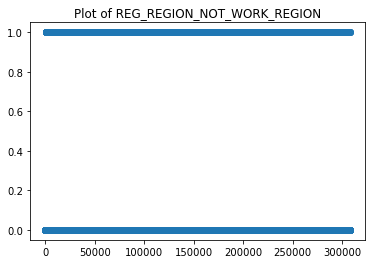

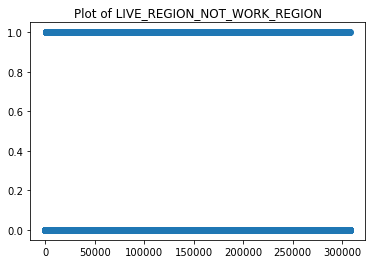

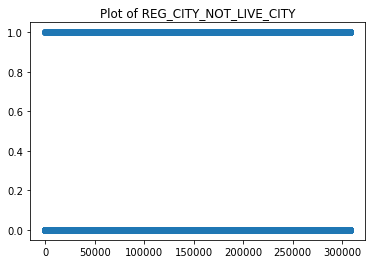

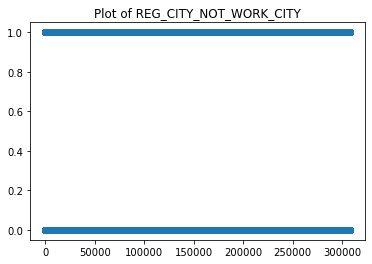

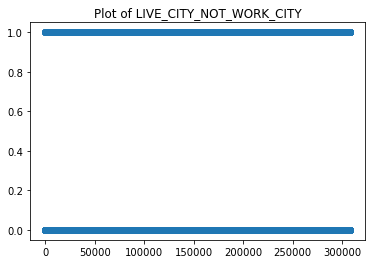

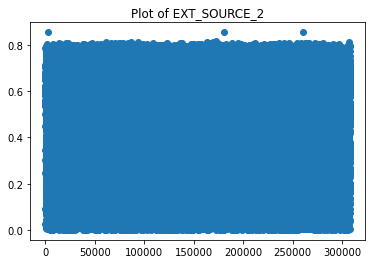

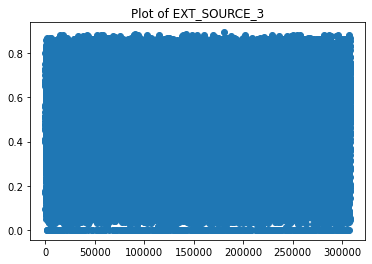

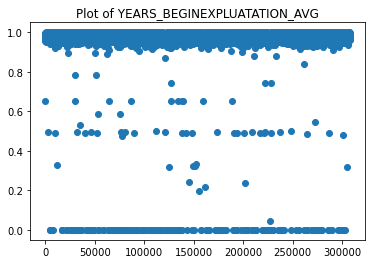

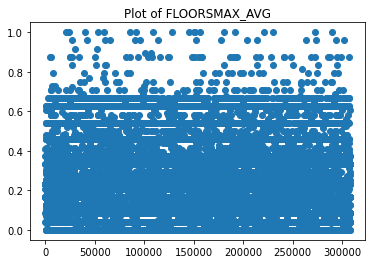

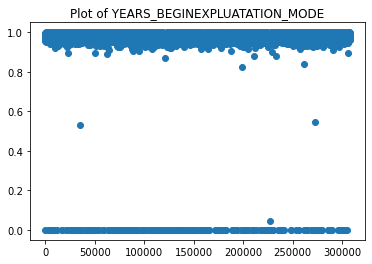

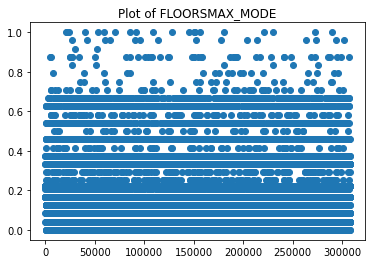

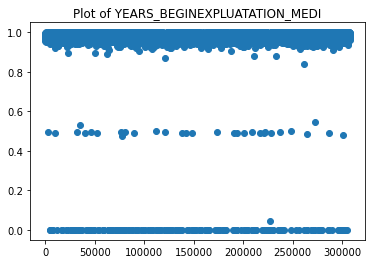

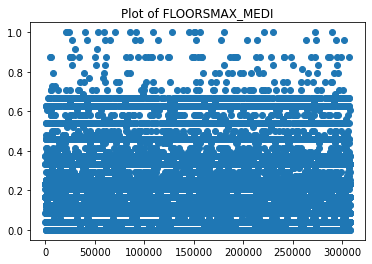

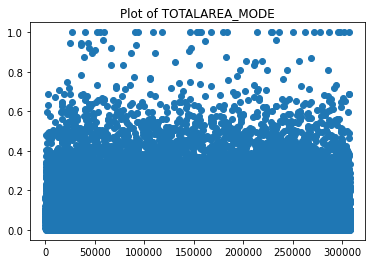

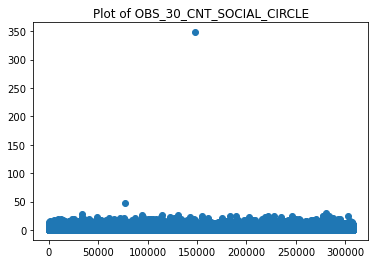

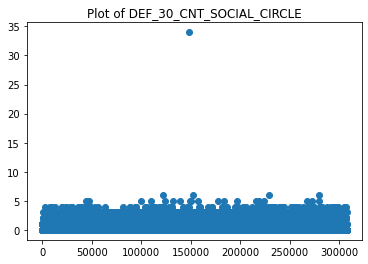

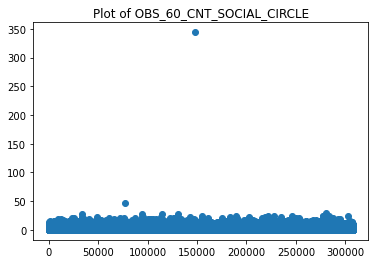

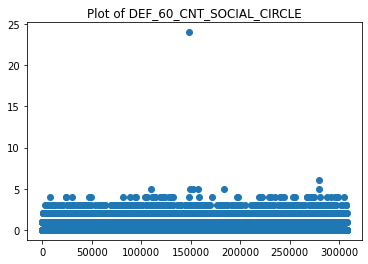

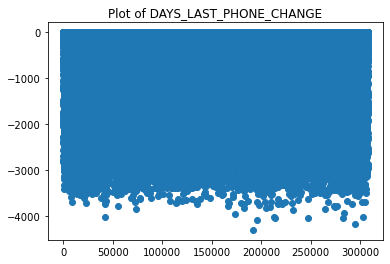

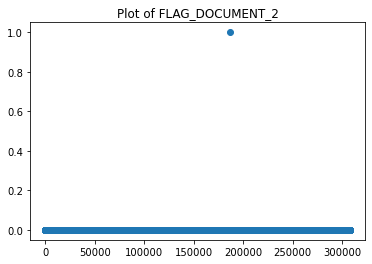

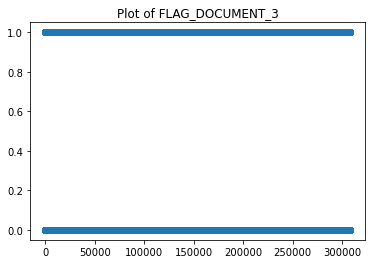

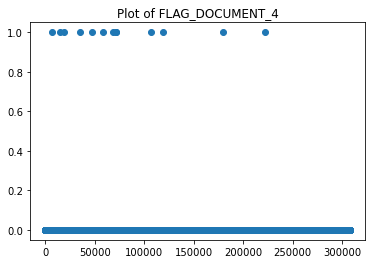

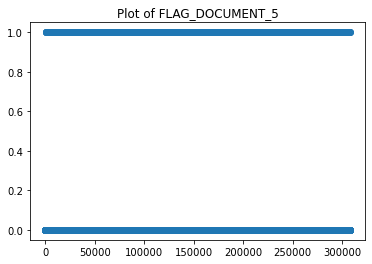

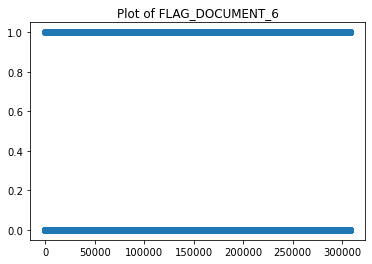

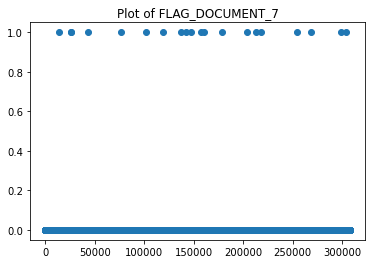

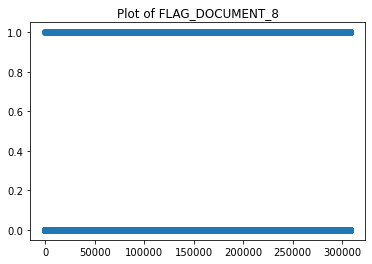

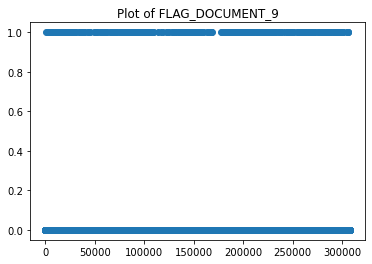

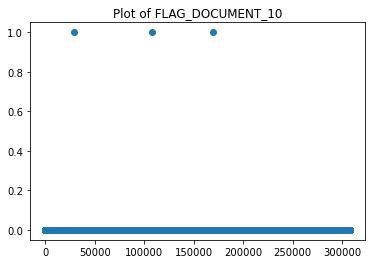

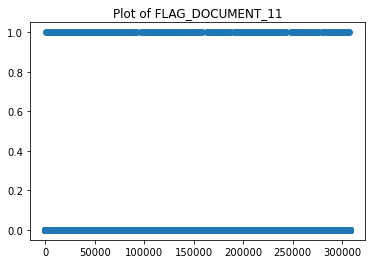

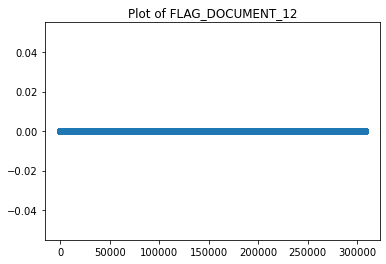

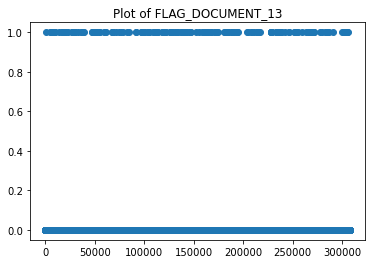

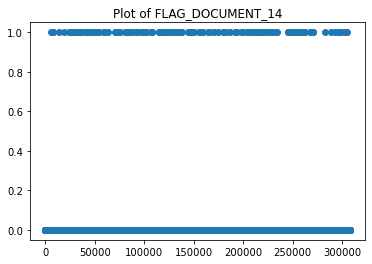

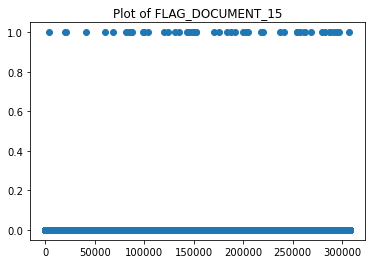

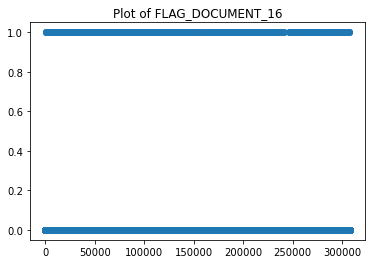

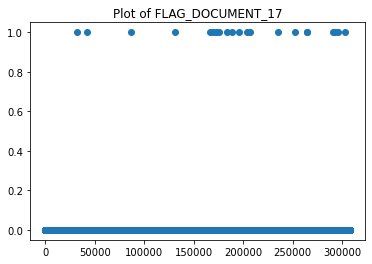

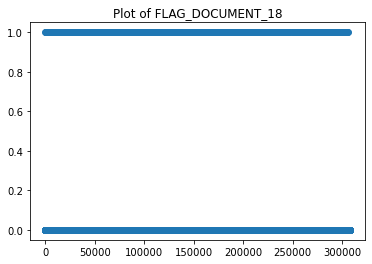

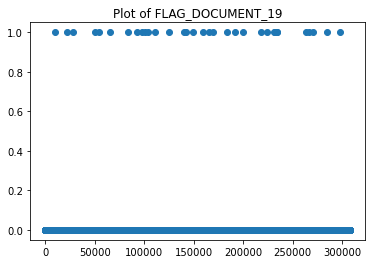

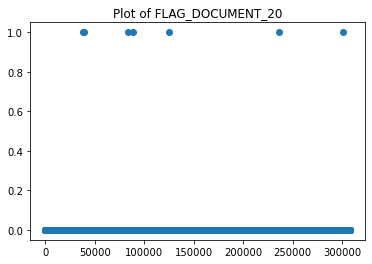

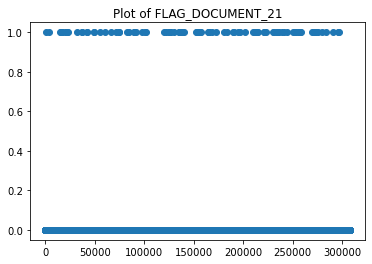

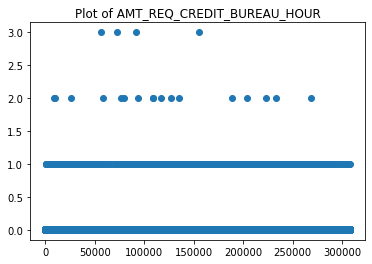

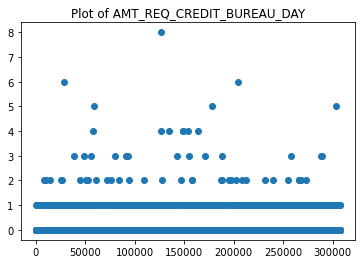

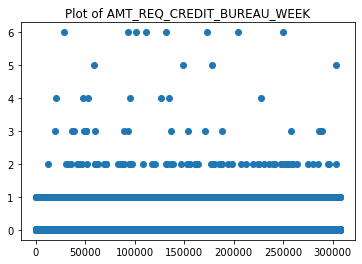

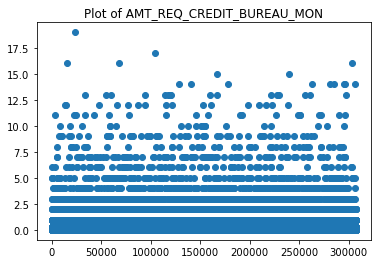

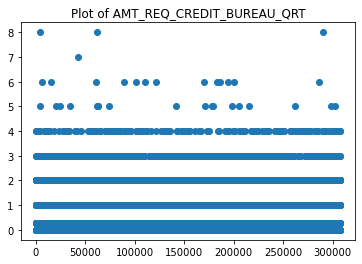

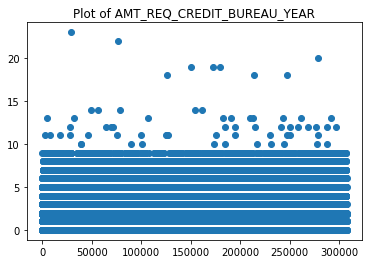

In [546]:
# Plotting outliers using scatter plot

for column in train_numerical:
    plt.scatter(a.index,a[column])
    plt.title("Plot of "+column)
    plt.show()

In [553]:
### Working on File 2 (b)

## There are duplicate 'SK_ID_CURR' as a person could have taken loan multiple times
## Number of unique ID in File 2

b.SK_ID_PREV.value_counts()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [ ]:
# Insights : 
#    The shape of previous application is(1670214, 37) and length of SK_ID_PREV is also(1670214) whereas the length of SK_ID_CURR is 338857 which tells us that there are duplicate number of SK_ID_PREV
#    Let's merge the 2 files 
#    After merging both the files, the new file will also have duplicate number of SK_ID_PREV which can be used to figure out if any patter is present by including the cases if a customer has previously taken loan more than once

In [555]:
# Merging files

b_train = a.merge(b, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'inner')

In [556]:
b_train.shape

(509851, 117)

In [557]:
b_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
1,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
2,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0


In [562]:
# Segregating the data set on target=0 and target =1

new_train_0 = b_train.loc[b_train['TARGET'] == 0]
new_train_1 = b_train.loc[b_train['TARGET'] == 1]

In [568]:
#plotting data

def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize = (13,10))
    
    ax1 = plt.subplot(221)
    a[col].value_counts().plot.pie(autopct = "%.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+column)
    
    ax2 = plt.subplot(222)
    df1 = pd.DataFrame()
    df1['0'] = ((train_0[col].value_counts())/len(train_0))
    df1['1'] = ((train_1[col].value_counts())/len(train_1))
    df1.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')
    
    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue = hue, data =train_0, ax=ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 interms of percentage')
    
    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=train_1, ax=ax4)
    plt.xticks(rotation=90)
    
    fig.tight_layout()
    
    plt.show()

ValueError: Could not interpret input 'NAME_CONTRACT_STATUS'

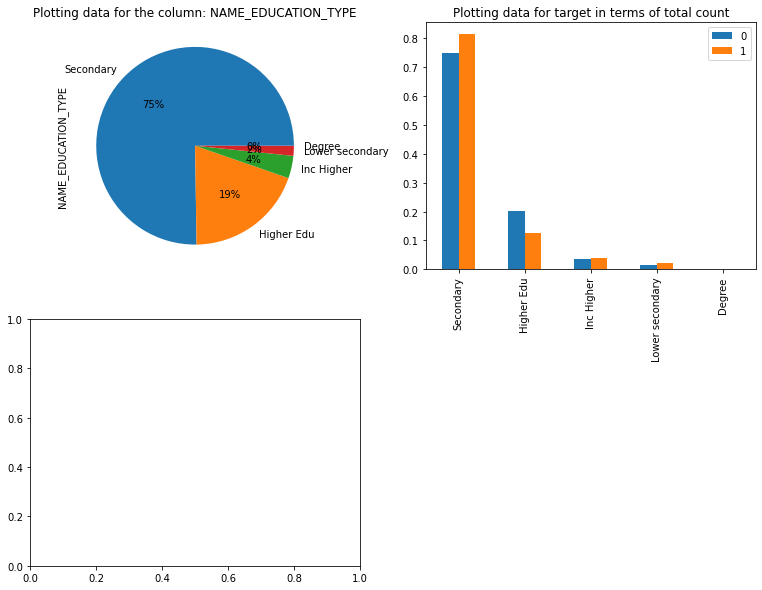

In [569]:
plotting('NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS')